# Matplotlib

Matplotlib is a plotting library used to create data visualizations. It allows users to generate figures composed of graphical elements such as plots, axes, and labels using Python code.

## Example: Simple plot

This example shows how to take two lists of numbers and draw a line plot.

**What happens step by step:**

You provide data values (`x` and `y`).
You call `plot()` to draw the data as a line.
You call `show()` to display the figure.

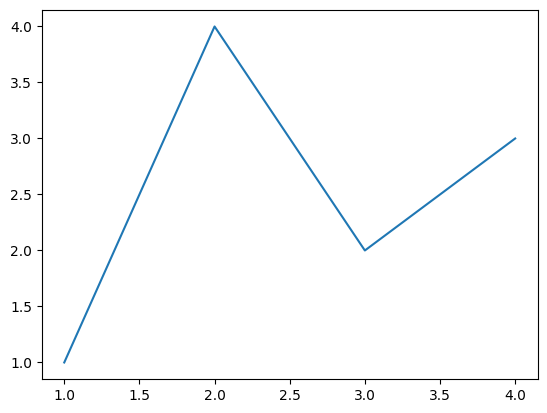

In [ ]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [1, 4, 2, 3]

plt.plot(x, y)
plt.show()

## Parts of a Figure

A figure is composed of several key elements.

![Parts of a Figure](https://matplotlib.org/stable/_images/anatomy.png)

### Figure

The **Figure** is the top-level container for a plot. It keeps track of all child Axes, as well as special visual elements such as titles, legends, colorbars, and even nested subfigures. A figure can be created empty or together with Axes objects.

#### Example: Different ways to create figures and axes

<Figure size 640x480 with 0 Axes>

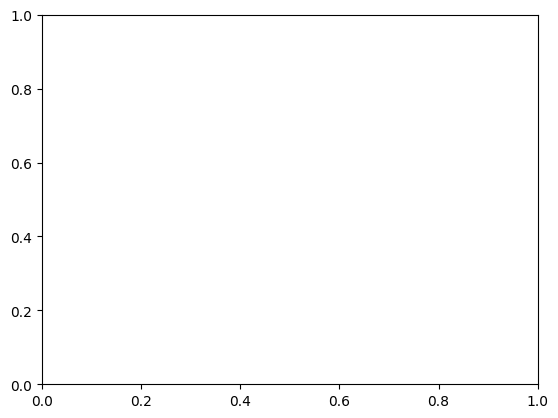

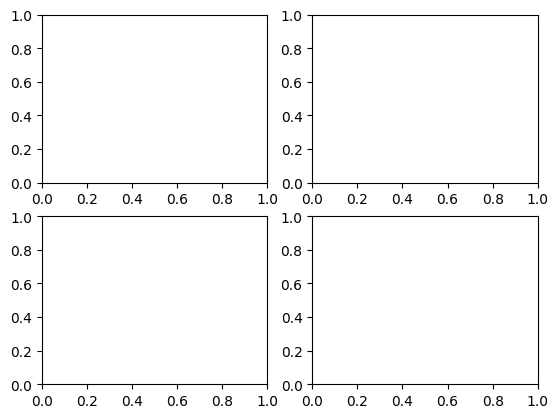

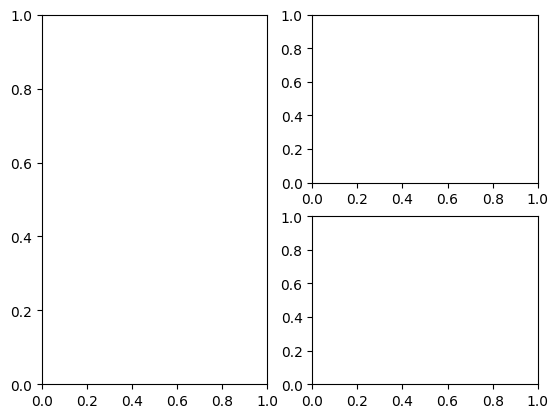

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()             # an empty figure with no Axes
fig, ax = plt.subplots()       # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
# a figure with one Axes on the left, and two on the right:
fig, axs = plt.subplot_mosaic([['left', 'right_top'],
                               ['left', 'right_bottom']])

#### Example: figure vs subplot_mosaic

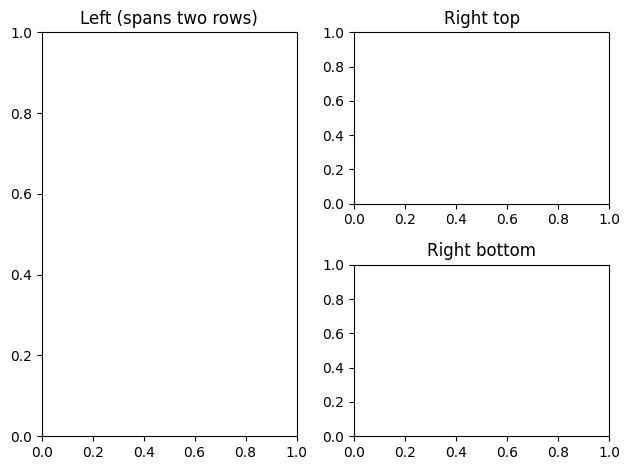

In [ ]:
# Create a figure with one Axes on the left, and two on the right useing subplot_mosaic
fig, axs = plt.subplot_mosaic([
    ['left', 'right_top'],
    ['left', 'right_bottom']
])

axs['left'].set_title("Left (spans two rows)")
axs['right_top'].set_title("Right top")
axs['right_bottom'].set_title("Right bottom")

fig.tight_layout()
plt.show()


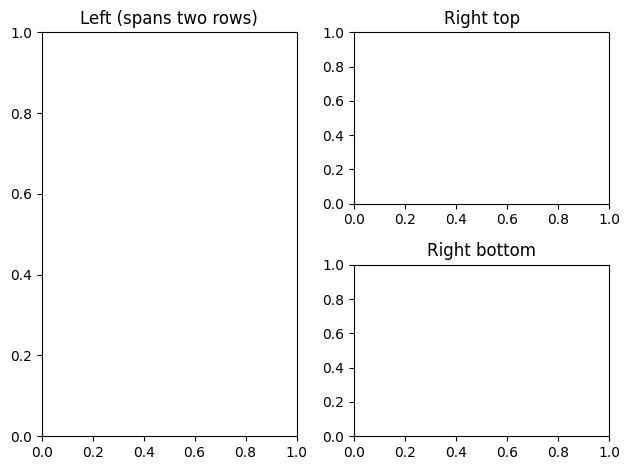

In [ ]:
# Create a figure with one Axes on the left, and two on the right useing add_subplot
fig = plt.figure()

ax_left = fig.add_subplot(2, 2, (1, 3))
ax_right_top = fig.add_subplot(2, 2, 2)
ax_right_bottom = fig.add_subplot(2, 2, 4)

ax_left.set_title("Left (spans two rows)")
ax_right_top.set_title("Right top")
ax_right_bottom.set_title("Right bottom")

fig.tight_layout()
plt.show()


### Axes

An **Axes** object represents a single plotting area within a Figure. It is an Artist attached to the Figure and contains the region where data is drawn. Each Axes usually includes two Axis objects (or three in the case of 3D plots), which provide the coordinate system.

An Axes also stores the plot title and the labels for the x- and y-directions, which can be set using `set_title()`, `set_xlabel()`, and `set_ylabel()`. Most interactions with a plot—such as adding data, setting limits, adjusting scales, and adding labels—are performed through methods of the Axes object.

### Axis

An **Axis** object is responsible for controlling a single dimension of the plot, such as the x-axis or y-axis. It defines the scale and limits of the data along that direction and generates ticks and tick labels.

The placement of ticks is handled by a Locator, while the formatting of tick labels is controlled by a Formatter. By choosing appropriate Locators and Formatters, very fine control over tick locations and labels can be achieved.

### Artists

Everything that appears in a figure is an **Artist**. This includes high-level objects such as Figures, Axes, and Axis objects, as well as visible elements like text, lines, patches, and collections. When a figure is rendered, all Artists are drawn onto the canvas. Most Artists are associated with a single Axes and cannot be shared between different Axes or moved from one to another.

## Implicit vs explicit syntax

A common source of confusion is the difference between explicit and implicit plotting syntax in `matplotlib`. This is the difference between using `ax.plot()` notation (explicit or object oriented syntax) versus using `plt.plot()` (implicit  or procedural syntax). The explicit syntax tells `matplotlib` exactly which set of axes you'd like to place the plot (in this case `ax`). Implicit syntax assumes which axes you want to add the plot to, and in this case, it would be the last axes that you created or used. You'll often see the implicit syntax in tutorials and Stack Overflow discussions, however, I *strongly* encourage you to use the explicit syntax to avoid confusion, especially in cases when you're creating subplots.

Let's take a quick look at an example of what happens when you try to use implicit and explicit syntax in a situation with subplots using the data below. Let's say we want to plot y1 on a plot on the left and y2 on a plot on the right

In [ ]:
# Create some data to plot
x = [1, 2, 3, 4, 5]
y1 = [1, -2, 3, -4, 5]
y2 = [0, 2, 4, 6, 8]

Let's start with the explicit syntax - we create a plot with two subplots and plot each on the corresponding axes:

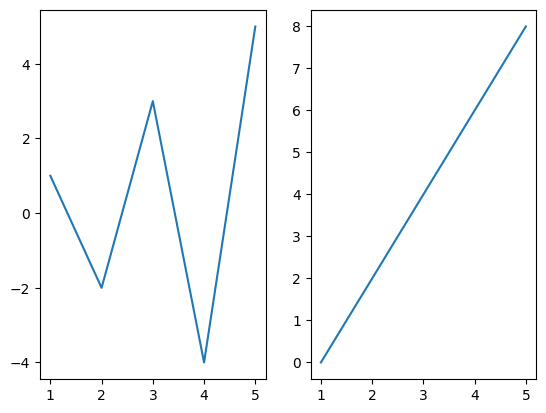

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)  # nrows, ncols of axes
ax1.plot(x, y1)
ax2.plot(x, y2)
plt.show()

Now, let's repeat this using implicit syntax following the same formula:

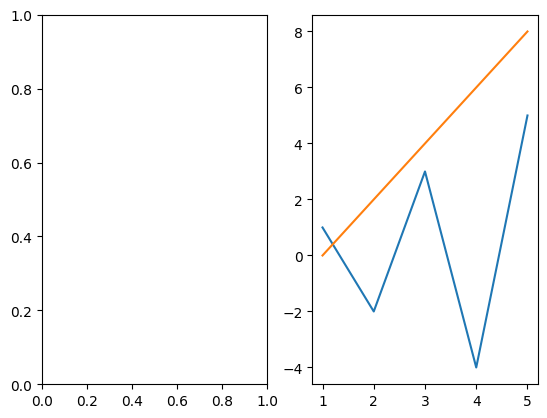

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)  # nrows, ncols of axes
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

What happened here? In this case, `matplotlib` created the left axes first, then the right axes, so the last axes that was created was the one on the right. Therefore, the implicit syntax (`plt.plot()`) *assumes* you want to plot things on the last plot used, hence you get the two plots of `y1` and `y2` on the same set of axes. To correct this, you have to make the axes you want to plot on become "active", which can be done using `plt.sca()`. However, this is cumbersome, as shown below. Using the axes-centered explicit syntax removes any potential ambiguity from your code which becomes even more challenging when you begin customizing plots.

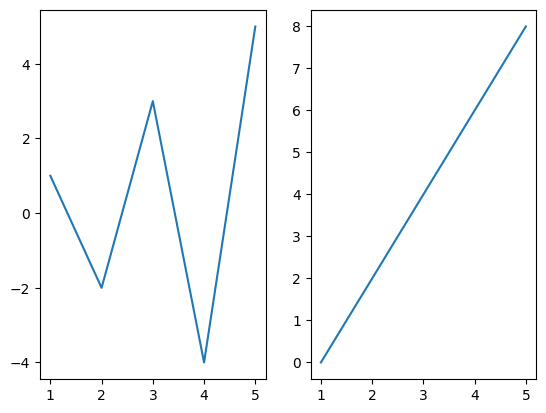

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)  # nrows, ncols of axes
plt.sca(ax1)
plt.plot(x, y1)
plt.sca(ax2)
plt.plot(x, y2)
plt.show()

## Plot types

Matplotlib offers several basic plot types that differ mainly in **how values are visually represented**.
Some plots emphasize continuity (lines), others highlight individual values (points or bars), while some focus on **areas** or **step-like changes**.
The choice of plot type changes the interpretation of the same data, even if the numbers do not change.

We will reuse the same basic data whenever possible.

In [ ]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [1, 4, 2, 3]

### Line plot

Shows how a value changes continuously over time, iterations, or epochs.

**In ML, commonly used to visualize:**

* training and validation **loss** over epochs
* training and validation **accuracy** over epochs
* learning curves
* changes of a metric during optimization (e.g. reward in reinforcement learning)

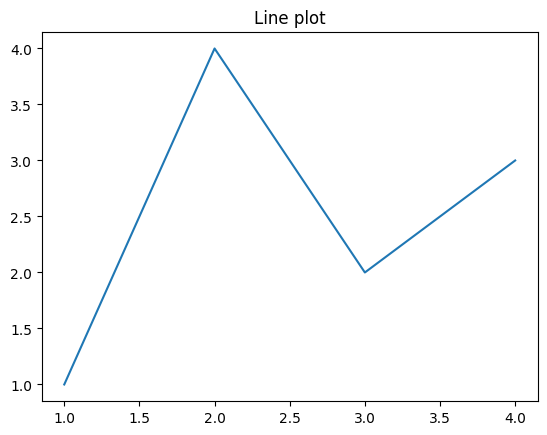

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, y)
ax.set_title("Line plot")

plt.show()

### Scatter plot

Shows individual data points as independent observations.

**In ML, commonly used to visualize:**

* data distribution in feature space
* relationship between two features
* clustering results (e.g. K-means assignments)
* true values vs. predictions
* outliers and anomalies

#### When to Connect Points in a Scatter Plot?

Connect Points
* When data represents a continuous trend (e.g., time series, functions).
* When you want to show relationships between consecutive points.

Do Not Connect Points
* When data points are independent (e.g., survey responses, categorical data).
* When there is no natural order or progression between points.

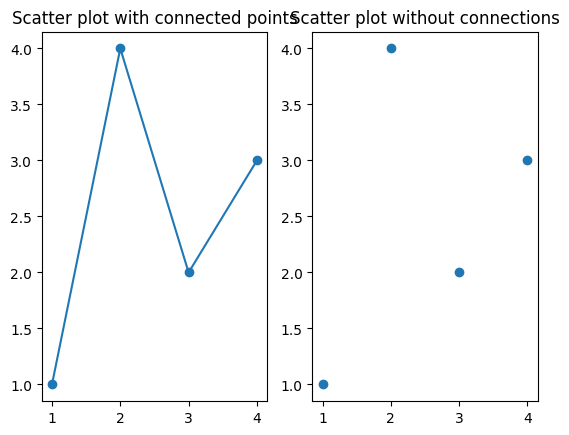

In [ ]:
fig, axes = plt.subplots(1, 2)

# Scatter plot with connected points
axes[0].plot(x, y, marker="o")
axes[0].set_title("Scatter plot with connected points")

# Scatter plot without connected points
axes[1].scatter(x, y)
axes[1].set_title("Scatter plot without connections")

plt.show()

### Bar plot

Represents discrete values for different categories.

**In ML, commonly used to visualize:**

* model performance across different models
* feature importance values
* class distribution in a dataset
* metric values (accuracy, F1, recall) per model

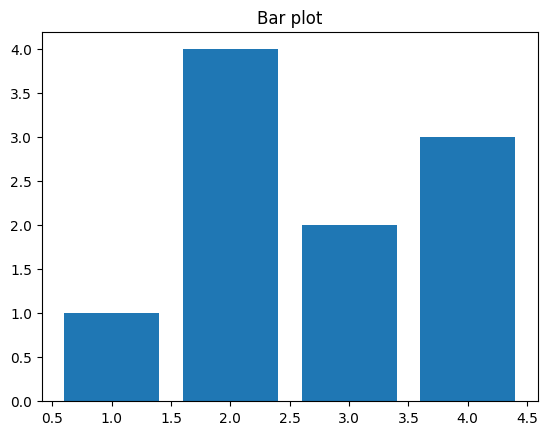

In [ ]:
plt.bar(x, y)
plt.title("Bar plot")
plt.show()

### Plotting multiple datasets in one plot

In Matplotlib, you can draw more than one dataset on the same Axes by calling a plotting function multiple times before displaying the figure. Each call adds a new graphical element to the same plot.

This makes it possible to directly compare different datasets using a shared coordinate system.

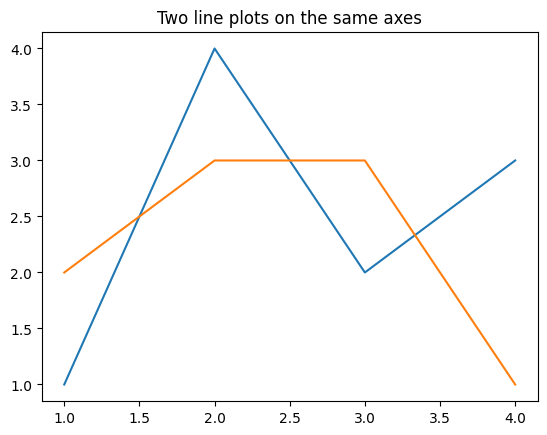

In [ ]:
# Data
x = [1, 2, 3, 4]
y1 = [1, 4, 2, 3]
y2 = [2, 3, 3, 1]

# Create figure and axes
fig, ax = plt.subplots()

# Plot lines on the same axes
ax.plot(x, y1)
ax.plot(x, y2)

# Set titles and labels
ax.set_title("Two line plots on the same axes")

# Display the plot
plt.show()


## Improving plot readability

After drawing the data, the next step is to make the plot **understandable**.
This is done by adding descriptive elements such as titles, axis labels, and legends. These elements do not change the data, but they strongly affect how the plot is interpreted.

## Adding a title

A title describes what the plot shows.

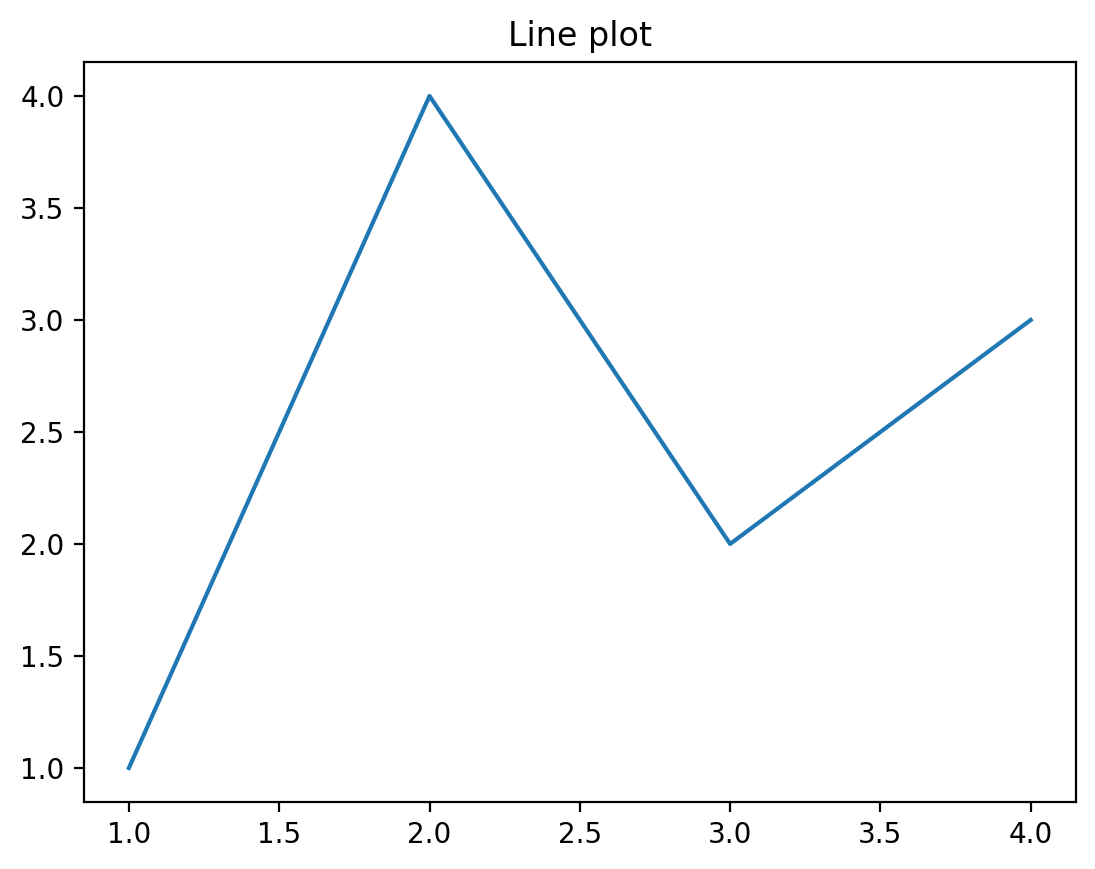

In [ ]:
x = [1, 2, 3, 4]
y = [1, 4, 2, 3]

fig, ax = plt.subplots()

ax.plot(x, y)
ax.set_title("Line plot")

plt.show()

## Adding axis labels

Axis labels explain what the values on each axis represent.

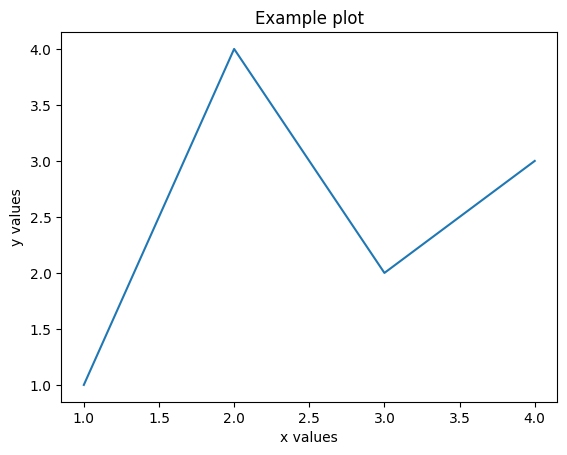

In [ ]:
plt.plot(x, y)
plt.title("Example plot")
plt.xlabel("x values")
plt.ylabel("y values")
plt.show()

## Adding a legend

A legend is useful when multiple datasets are shown on the same plot.
It explains which graphical element corresponds to which data.

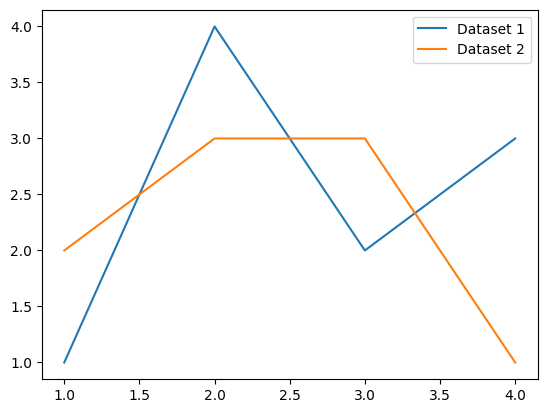

In [ ]:
y2 = [2, 3, 3, 1]

plt.plot(x, y, label="Dataset 1")
plt.plot(x, y2, label="Dataset 2")
plt.legend()
plt.show()

### Legend position

When a plot contains a legend, its position matters for readability.
By default, Matplotlib tries to place the legend automatically, but you can explicitly control where it appears.

The position of the legend is set using the `loc` argument in `legend()`.

#### Automatic placement

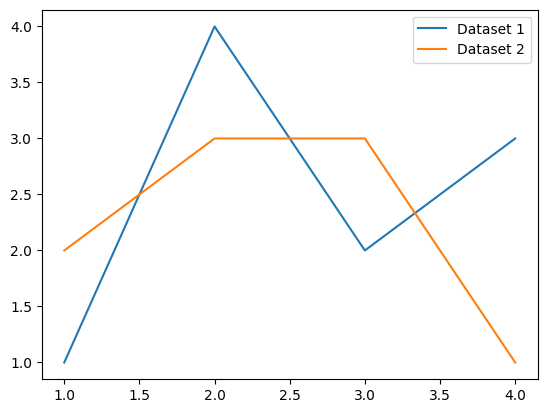

In [ ]:
x = [1, 2, 3, 4]
y1 = [1, 4, 2, 3]
y2 = [2, 3, 3, 1]

plt.plot(x, y1, label="Dataset 1")
plt.plot(x, y2, label="Dataset 2")

plt.legend()
plt.show()

#### Explicit legend positions

You can move the legend by specifying a location.

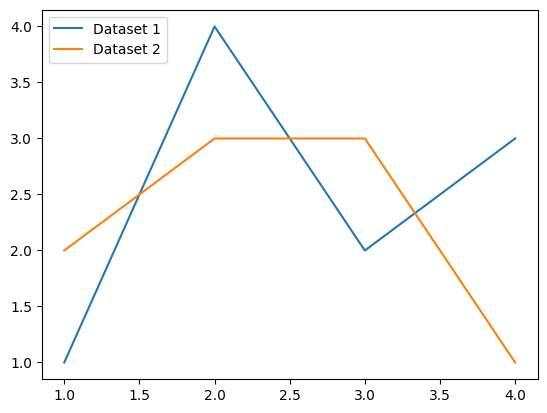

In [ ]:
plt.plot(x, y1, label="Dataset 1")
plt.plot(x, y2, label="Dataset 2")
plt.legend(loc="upper left")
plt.show()

Other common positions include `"upper right"`, `"lower left"`, `"lower right"`, and `"center"`.

### Legend outside the plot area

The legend can also be placed outside the plotting area.

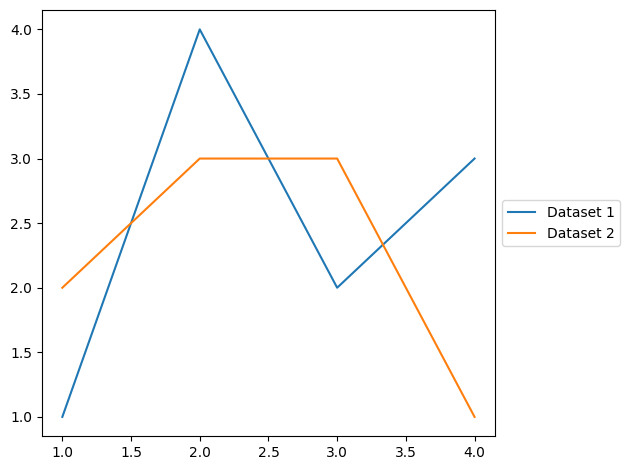

In [ ]:
plt.plot(x, y1, label="Dataset 1")
plt.plot(x, y2, label="Dataset 2")

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

## Adjusting layout

When a plot contains several text elements, they may overlap.
Matplotlib can automatically adjust spacing.

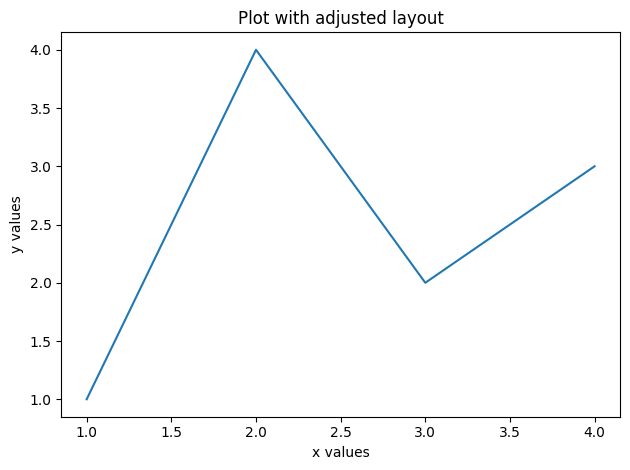

In [ ]:
plt.plot(x, y)
plt.title("Plot with adjusted layout")
plt.xlabel("x values")
plt.ylabel("y values")

plt.tight_layout()
plt.show()

### Grid

A grid helps visually align values and read the plot more easily.

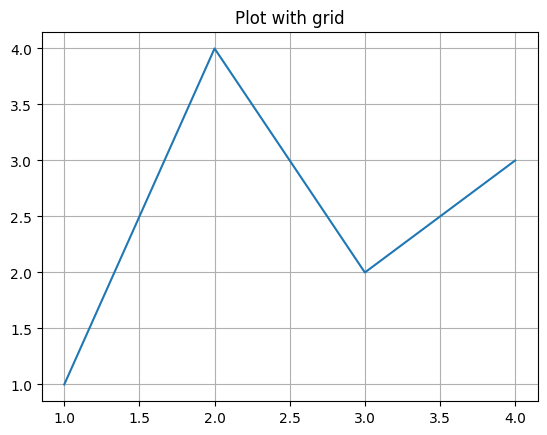

In [ ]:
plt.plot(x, y)
plt.title("Plot with grid")
plt.grid(True)
plt.show()

## Working with axes

Axes control how data values are displayed.
Operations on axes allow you to adjust limits, ticks, and alignment between multiple plots.

### Setting axis limits

You can explicitly define the visible range of the axes.

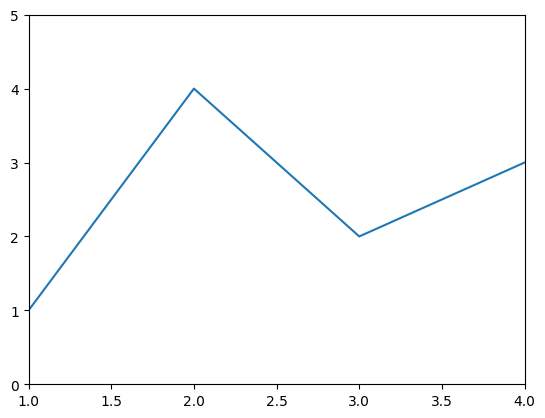

In [ ]:
plt.plot(x, y1)
plt.xlim(1, 4)
plt.ylim(0, 5)
plt.show()

### Setting ticks manually

Ticks can be placed at specific positions.

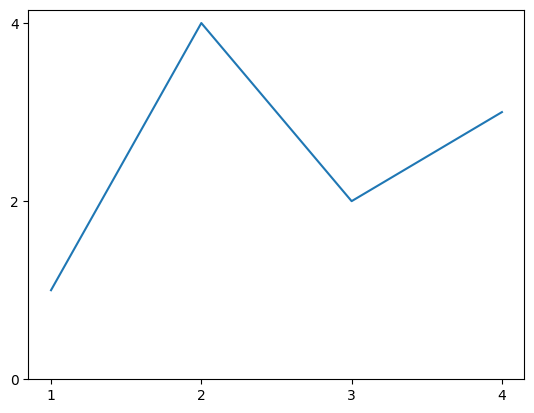

In [ ]:
plt.plot(x, y1)
plt.xticks([1, 2, 3, 4])
plt.yticks([0, 2, 4])
plt.show()

### Controlling tick density (resolution)

Tick density can be adjusted by choosing how many tick positions you want.

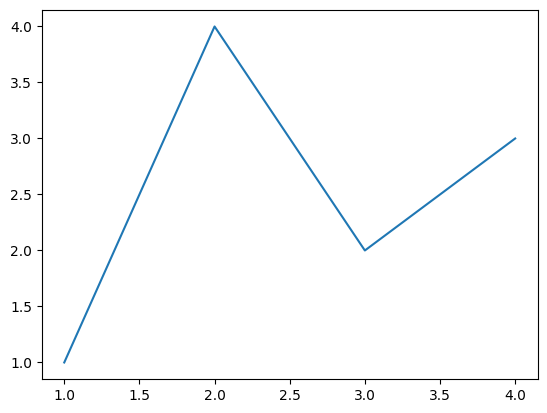

In [ ]:
import numpy as np

plt.plot(x, y1)
plt.xticks(np.linspace(1, 4, 7))
plt.show()

### Rotating x-axis tick labels

Tick rotation changes the angle of tick labels, not the ticks themselves.

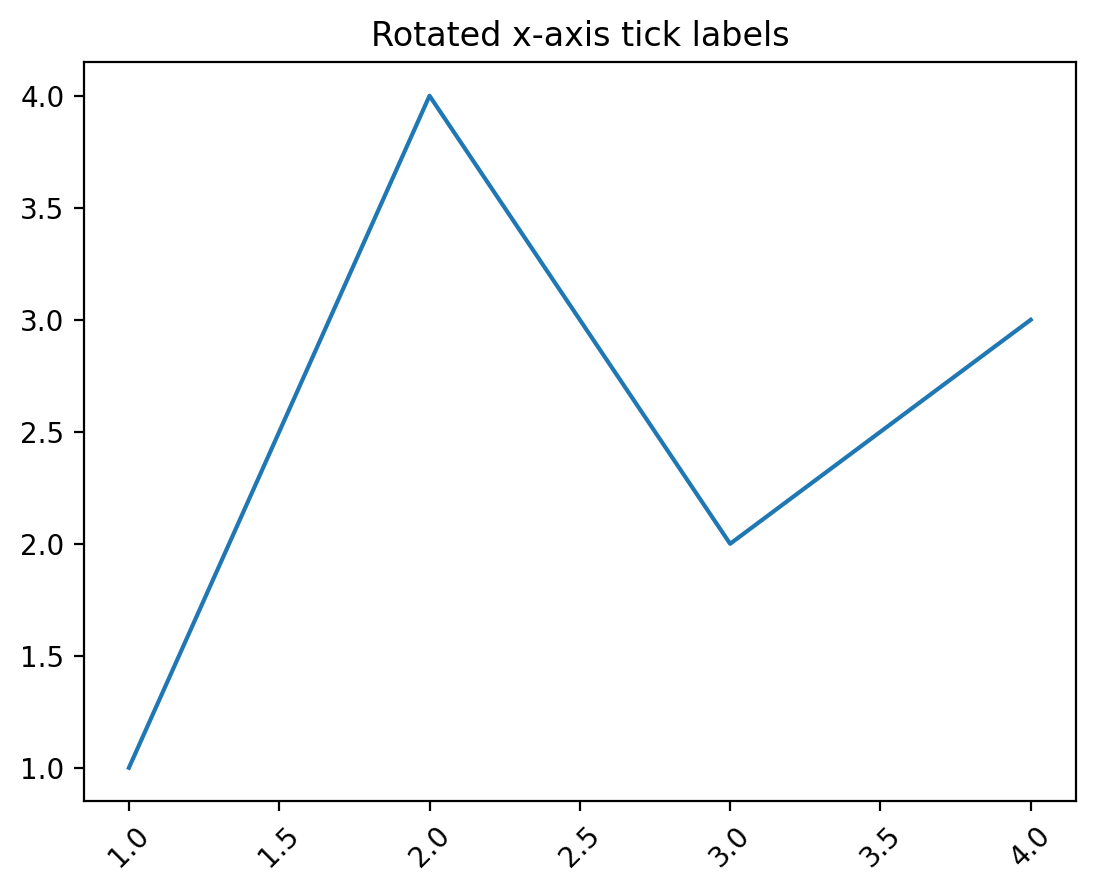

In [ ]:
# Plot
fig, ax = plt.subplots()
ax.plot(x, y)

# Set custom x-ticks
ax.set_xticks(np.linspace(1, 4, 7))

# Rotate x-axis tick labels
ax.tick_params(axis="x", rotation=45)

ax.set_title("Rotated x-axis tick labels")

plt.show()


### Aligning axes across multiple plots

When multiple plots are shown side by side or one above the other, it is often important that they share the same axis values.

#### Shared axes using `subplots()`

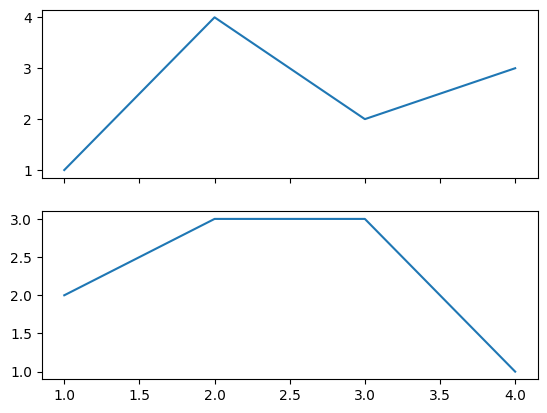

In [ ]:
fig, axs = plt.subplots(2, 1, sharex=True)

axs[0].plot(x, y1)
axs[1].plot(x, y2)

plt.show()

Both plots now use the same x-axis scale.

---

### Sharing both x and y axes

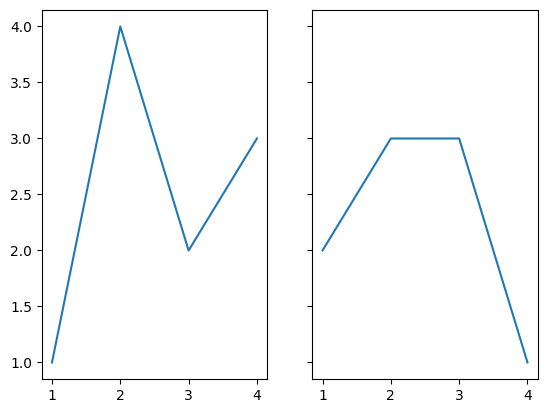

In [ ]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True)

axs[0].plot(x, y1)
axs[1].plot(x, y2)

plt.show()

This guarantees that both plots use identical x and y ranges, making visual comparison easier.

### Aspect Ratio

The image demonstrates how aspect ratio affects the way data is visually represented.

Why it matters
- **Prevents Misinterpretation**: Unequal aspect ratios can distort shapes, making circles look like ellipses.
- **Ensures Accuracy**: Essential in fields like science and mapping where proportions must be maintained.
- **Keeps Data Representation Clear**: Distortions can mislead analysis; equal aspect ratios preserve true relationships

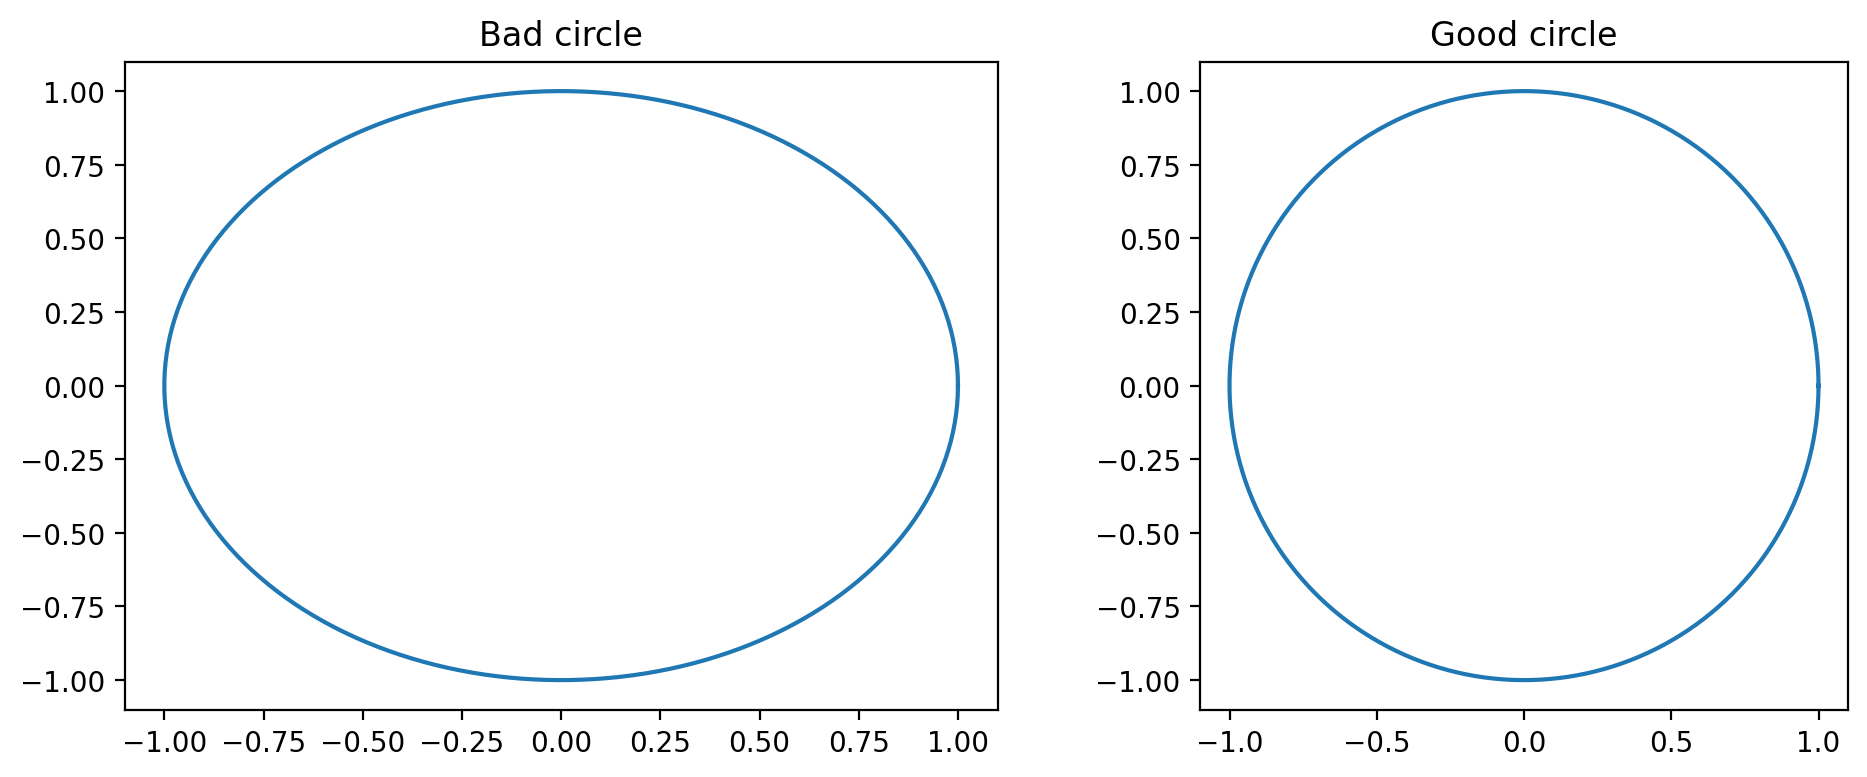

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

theta = np.linspace(0, 2 * np.pi, 200)
x, y = np.cos(theta), np.sin(theta)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Bad: default aspect ratio (circle looks like an ellipse)
axes[0].plot(x, y)
axes[0].set_title("Bad circle")

# Good: equal scaling on x and y axes
axes[1].plot(x, y)
axes[1].set_aspect("equal")
axes[1].set_title("Good circle")

plt.tight_layout()
plt.show()


## Style and aesthetics in Matplotlib

Once a plot is technically correct, the next question is **how it looks**.
Style and aesthetics do not change the data itself, but they strongly influence how the data is perceived and interpreted.

In Matplotlib, aesthetics are controlled by choosing colors, line styles, markers, and overall visual styles. These choices help make plots clearer, more readable, and more consistent.

### Plot styles

You can customize the plot style by changing colors, using different line types, and adding markers to control how the data is visually presented.

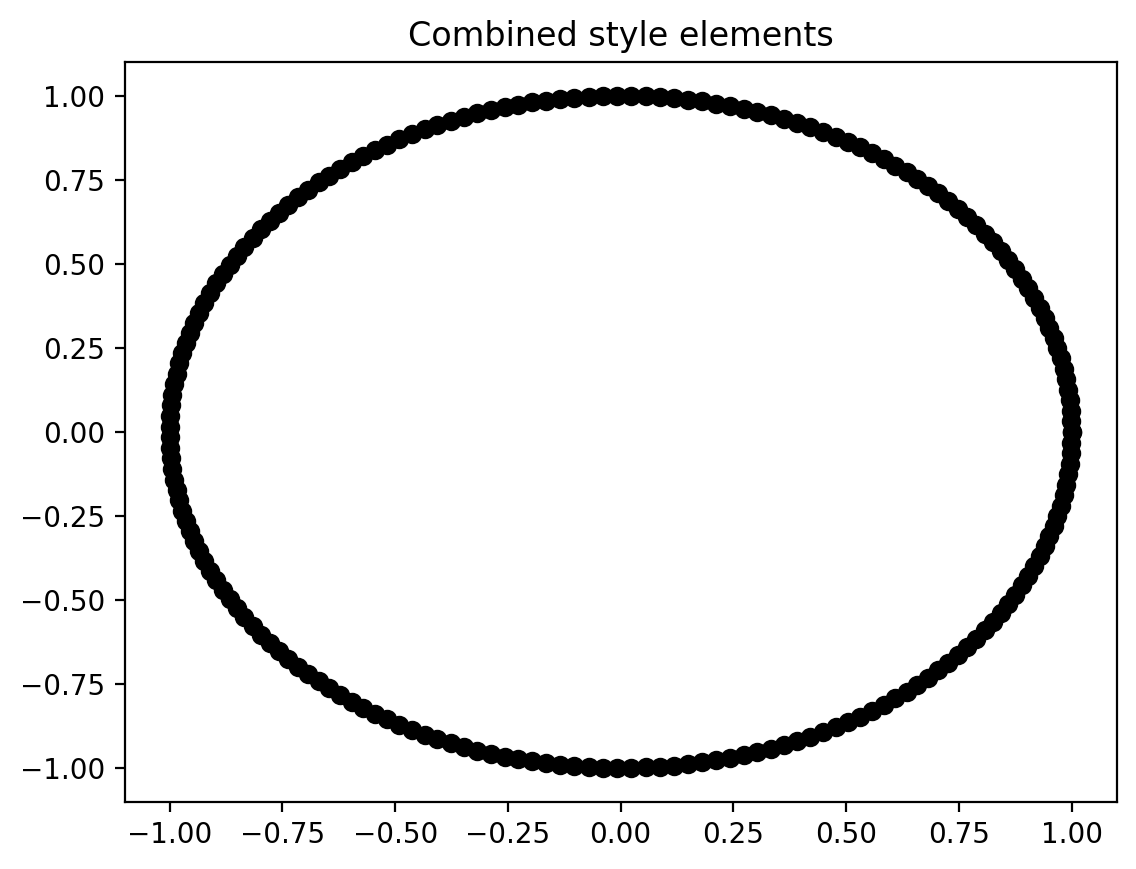

In [ ]:
plt.plot(x, y, color="black", linestyle="--", marker="o")
plt.title("Combined style elements")
plt.show()

### Change line width and transparency

Makes important lines stand out and secondary ones fade into the background.

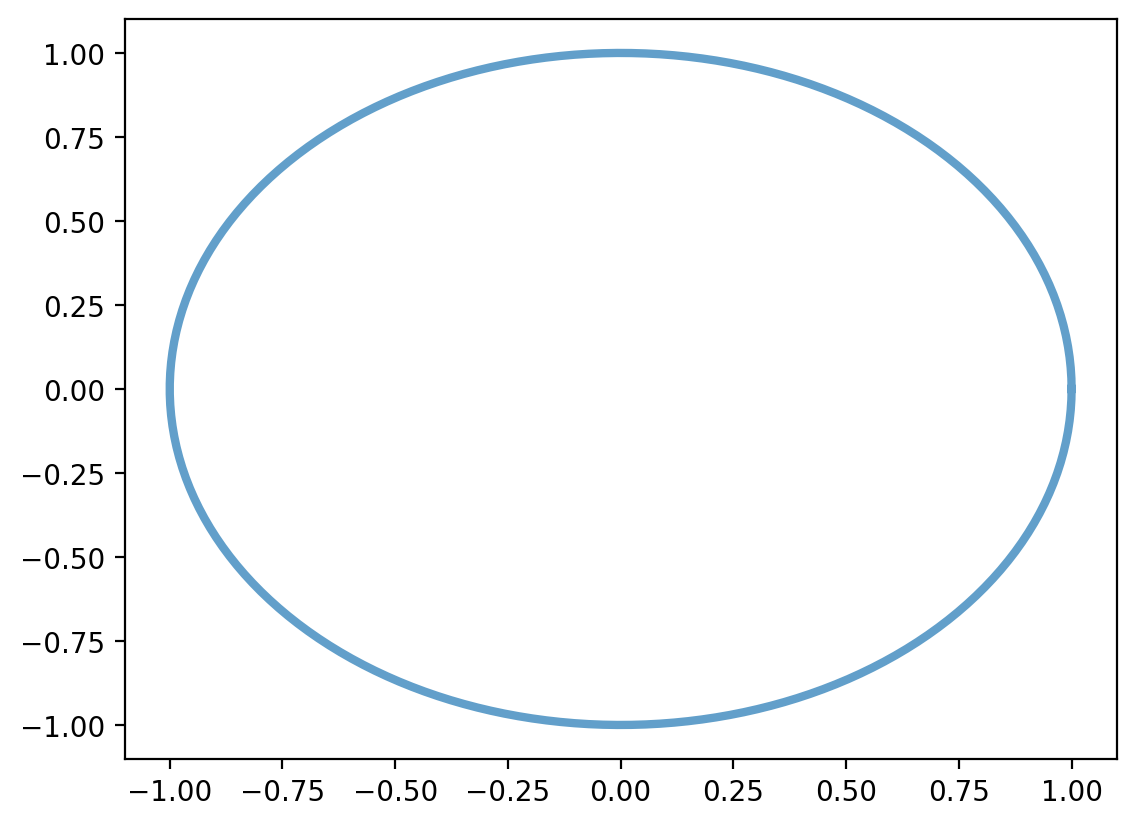

In [ ]:
plt.plot(x, y, linewidth=3, alpha=0.7)

### Add markers with custom size and edge color

Improves readability of individual data points.

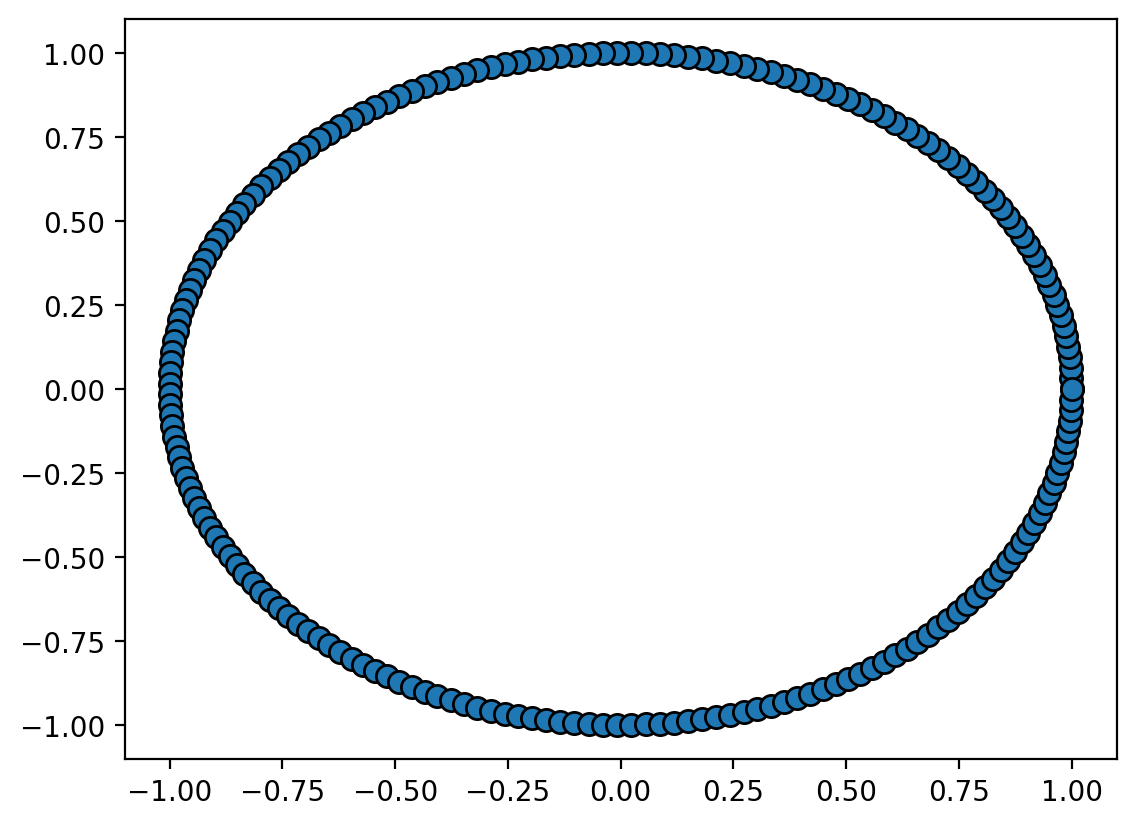

In [ ]:
plt.plot(x, y, marker="o", markersize=8, markeredgecolor="black")

### Use different color maps

Great for visualizing multiple lines or continuous values.

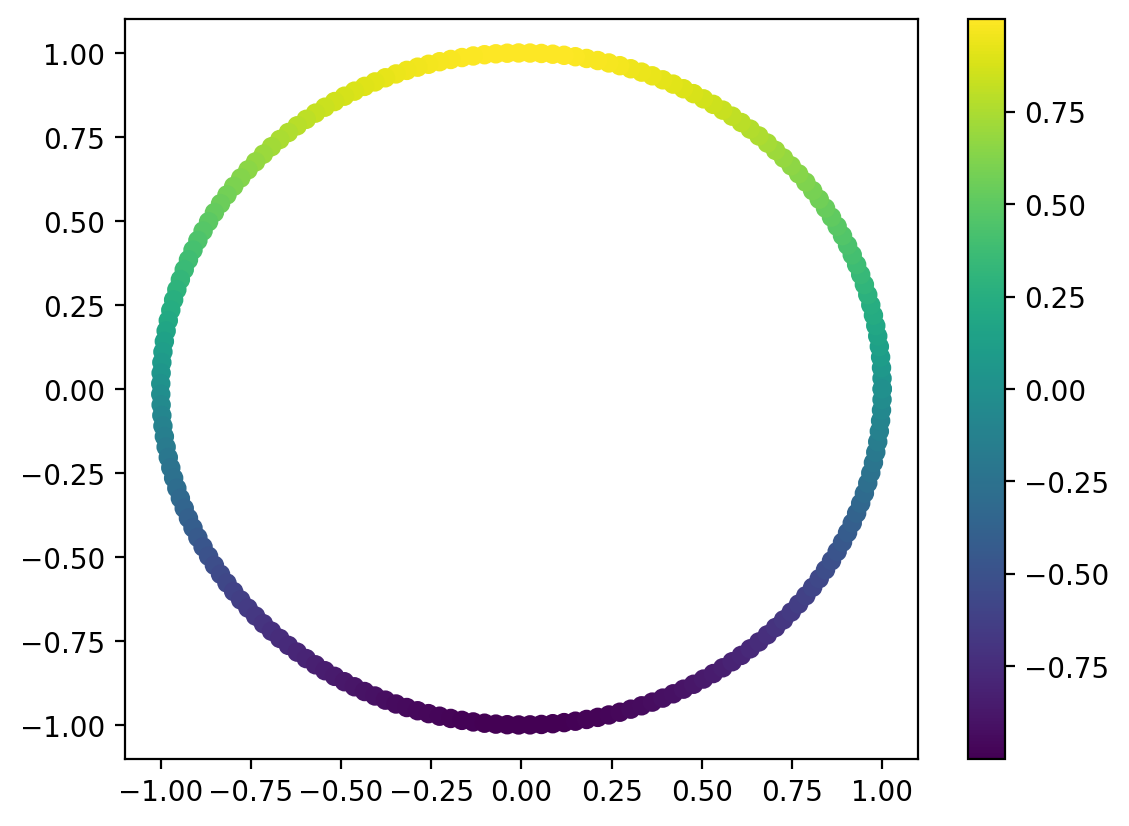

In [ ]:
plt.scatter(x, y, c=y, cmap="viridis")
plt.colorbar()

### Customize grid style

Helps with value estimation without overpowering the data.

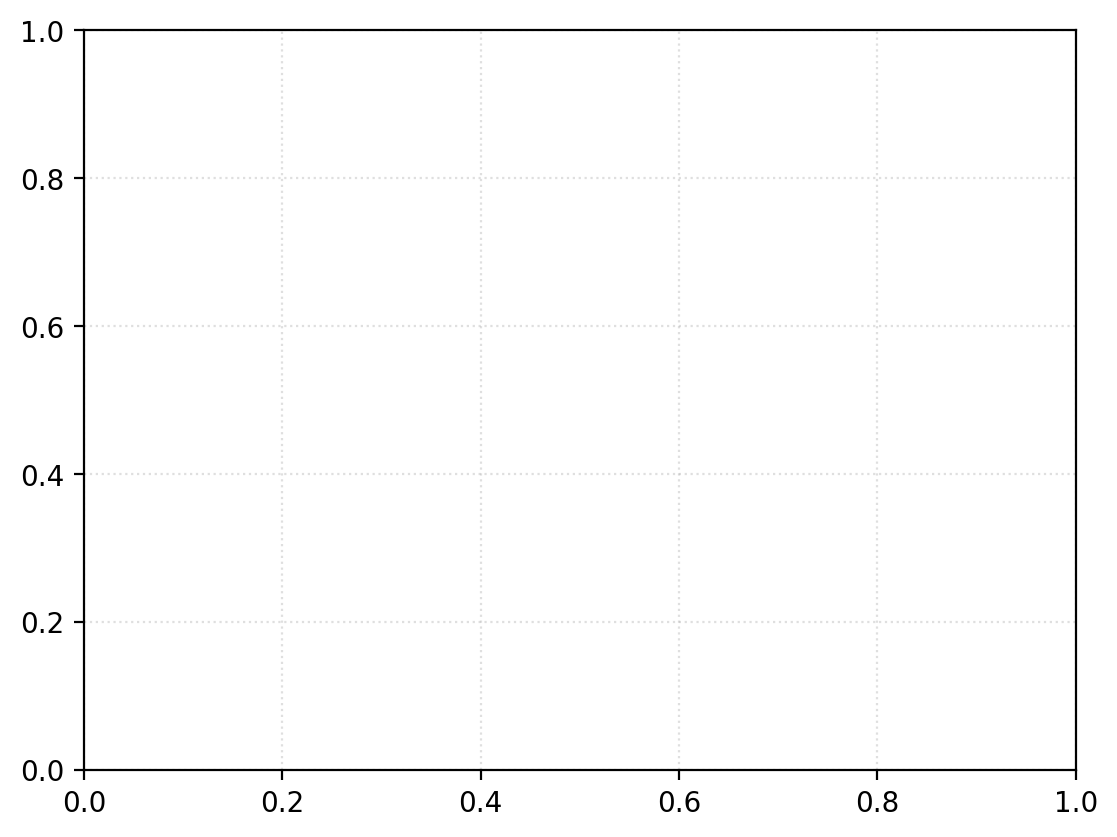

In [ ]:
plt.grid(True, linestyle=":", alpha=0.4)

### Highlight regions or thresholds

Very common in ML and data analysis.

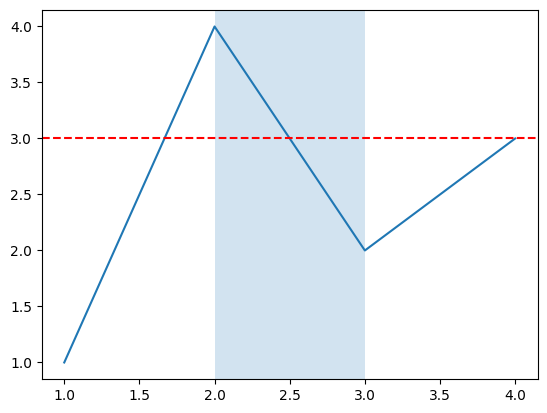

In [ ]:
plt.plot(x, y)
plt.axhline(y=3, color="red", linestyle="--")
plt.axvspan(2, 3, alpha=0.2)


## Example: Styling multiple datasets

When plotting multiple datasets, consistent styling helps interpretation.

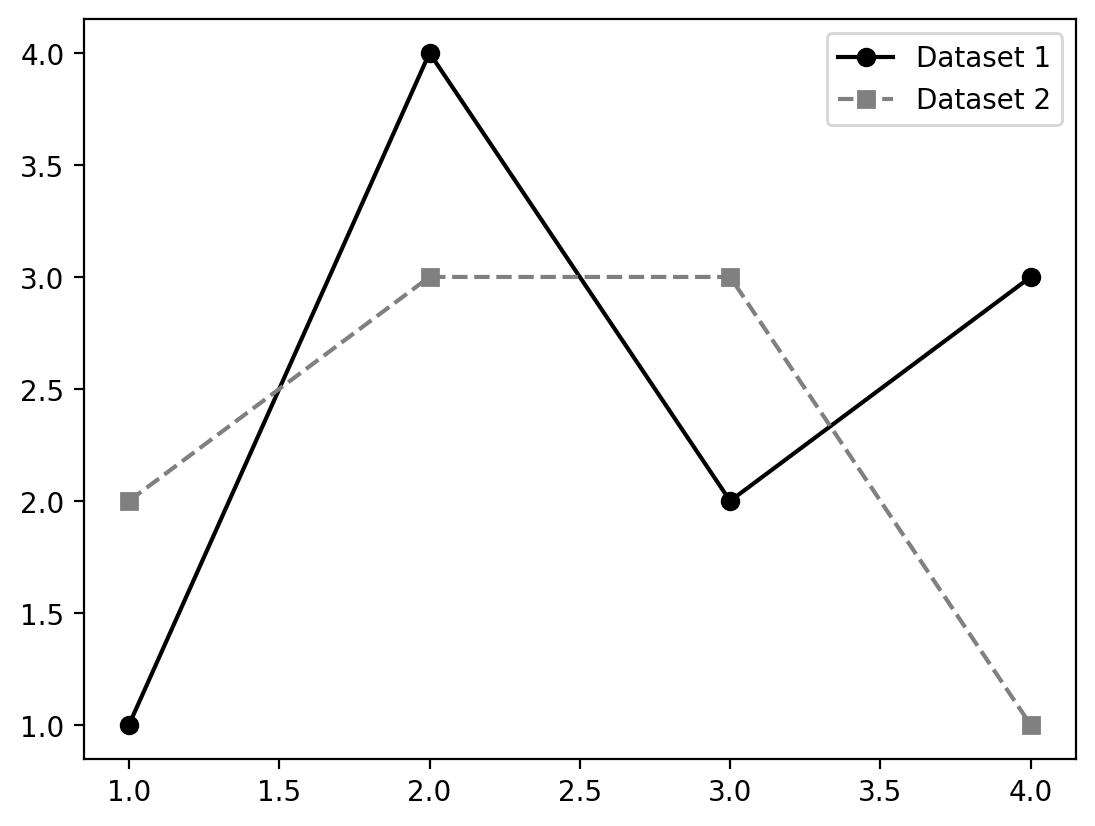

In [ ]:
x = [1, 2, 3, 4]
y1 = [1, 4, 2, 3]
y2 = [2, 3, 3, 1]

plt.plot(x, y1, color="black", linestyle="-", marker="o", label="Dataset 1")
plt.plot(x, y2, color="gray", linestyle="--", marker="s", label="Dataset 2")

plt.legend()
plt.show()

## Axis scaling

When visualizing a **loss function**, the choice of axis scale is often as important as the data itself.
Loss values typically decrease over time and may span **several orders of magnitude**, especially during training.

Using a linear scale in such cases can hide important details, particularly at later stages of optimization.

<img src="./Images/log_scale.jpeg" height="450">

When to Use Each Loss Scale?

Normal Scale (Linear)
* Use when loss values are within a narrow range (e.g., 0.1 to 0.001).
* Best for stable, non-exponential loss curves.
* Easier to interpret for small loss changes.

Log Scale
* Use when loss spans multiple orders of magnitude (e.g., 100 → 0.001).
* Helps visualize small improvements in later epochs.
* Useful when loss decreases exponentially.

---

### Linear scale: the default

By default, Matplotlib uses a **linear scale** for all axes.

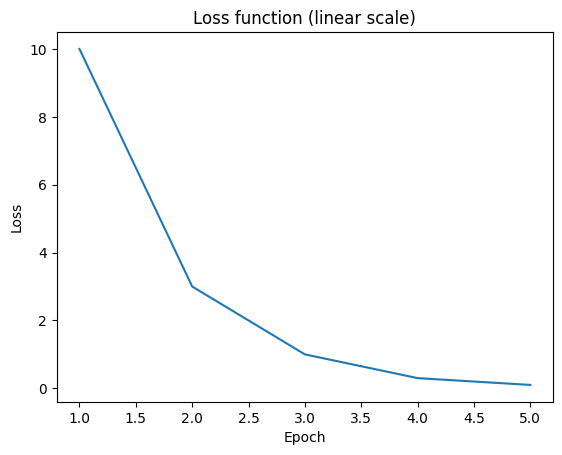

In [ ]:
epochs = [1, 2, 3, 4, 5]
loss = [10, 3, 1, 0.3, 0.1]

plt.plot(epochs, loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss function (linear scale)")
plt.show()

On a linear scale:

* early large decreases dominate the plot,
* small but important improvements later in training may appear almost flat.

This can give the impression that learning has stopped, even when it has not.

---

### Logarithmic scale

A **logarithmic scale** changes how values are mapped to the axis.
Instead of equal distances representing equal differences, they represent **equal ratios**.

This is especially useful for loss functions that decrease exponentially or multiplicatively.

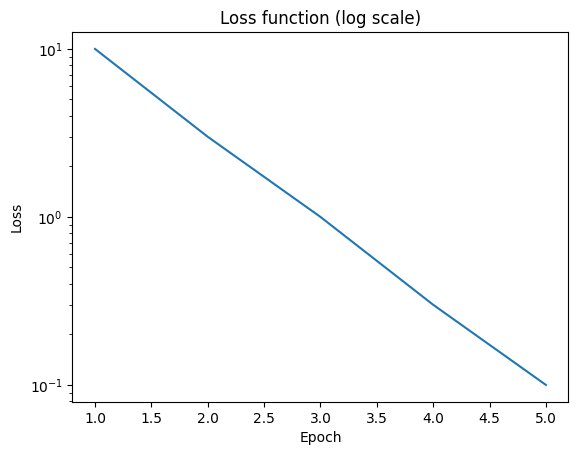

In [ ]:
plt.plot(epochs, loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.yscale("log")
plt.title("Loss function (log scale)")
plt.show()

With a logarithmic y-axis:

* both early and late stages of training become visible,
* relative improvements are easier to compare,
* small loss values are no longer visually compressed.

## Histograms

### Basic histogram

A histogram groups values into **bins** and counts how many values fall into each bin.

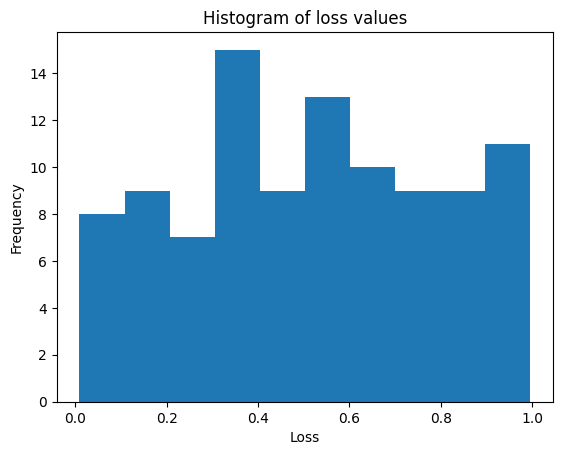

In [ ]:
loss_values = np.random.rand(100)

plt.hist(loss_values)
plt.title("Histogram of loss values")
plt.xlabel("Loss")
plt.ylabel("Frequency")
plt.show()

### Choosing the number of bins

The number of bins affects how detailed the histogram is.

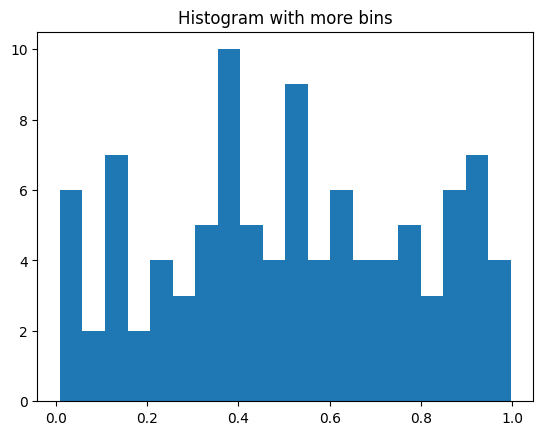

In [ ]:
plt.hist(loss_values, bins=20)
plt.title("Histogram with more bins")
plt.show()

* Too few bins → distribution is oversimplified
* Too many bins → histogram becomes noisy

Choosing bins is a modeling decision, not just a technical one.

---

### Comparing distributions

Two histograms can be plotted together to compare distributions, for example training vs validation loss.

Here, transparency (`alpha`) helps visualize overlap.

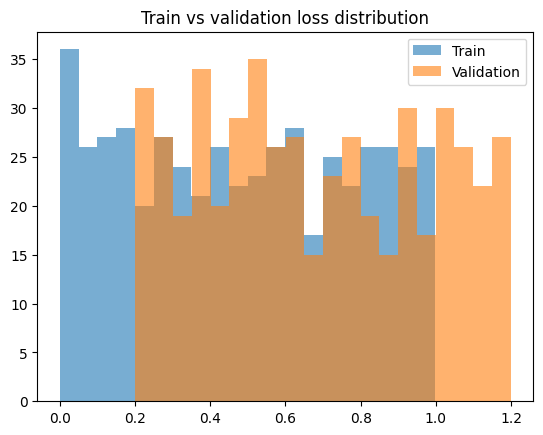

In [ ]:
train_loss = np.random.rand(500)
val_loss = np.random.rand(500) + 0.2

plt.hist(train_loss, bins=20, alpha=0.6, label="Train")
plt.hist(val_loss, bins=20, alpha=0.6, label="Validation")

plt.legend()
plt.title("Train vs validation loss distribution")
plt.show()

## Saving plots to files

Displaying a plot on the screen is often only one step in the workflow.
In practice, plots are frequently saved to files to be included in reports, presentations, or publications.

Matplotlib allows you to save a figure to a file using a single command. The saved image contains exactly what appears in the figure at the moment of saving.

---

The most common way to save a plot is by calling `savefig()`.

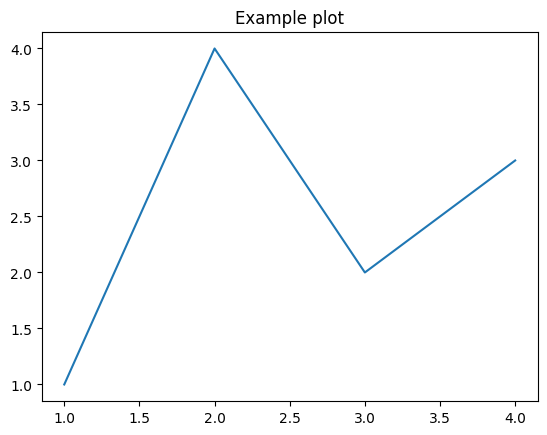

In [ ]:
x = [1, 2, 3, 4]
y = [1, 4, 2, 3]

plt.plot(x, y)
plt.title("Example plot")

plt.savefig("plot.png")
plt.show()

## Bonus: How to Interpret Histograms

A histogram is a useful tool for visualizing the distribution of a dataset. It helps identify patterns, such as which values occur most frequently and how the data is spread. The x-axis represents the variable being measured, divided into bins (ranges of values), while the y-axis shows the count (or frequency) of observations in each bin.

Histograms are useful for understanding the shape of a data set:

![his_shape](./Images/histogram_shape.png)

Knowing the shape of our data sets is important because it allows us to know how to further analyze our data.

In a symmetric distribution, the mean, median, and mode are equal, and the graph is balanced on both sides. When the distribution is right-skewed (positively skewed), the mean is pulled higher than the median and mode due to high values stretching the right tail. In a left-skewed (negatively skewed) distribution, the mean is lower than the median and mode because low values extend the left tail. The mean is most affected by extreme values, while the median and mode remain more stable.

![his_m_m](./Images/histogram_mean_median.png)

Histograms can be used to quickly compare 2 data sets. Aligning the plots vertically helps us see this horizontal change when the axes are fixed and have the same limits:

![his_comp](./Images/histogram_compare.png)

Histograms are useful to identify outliers in a data set:

![his_outli](./Images/histogram_outliers.png)

The shape of a histogram can be affected by changing the bin widths:

![his_bin_w](./Images/histogram_bins_widths.png)

## Biografia

[explicit_vs_implicit_syntax](https://www.practicaldatascience.org/notebooks/class_5/week_1/1.4.5_explicit_vs_implicit_syntax.html)
